<a href="https://colab.research.google.com/github/NurhayatYurtaslan/AdliBilisimOdev/blob/main/AdliBilisimOdev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En Düşük Bite Mesaj Ekleme

Mesaj başarıyla gizlendi.


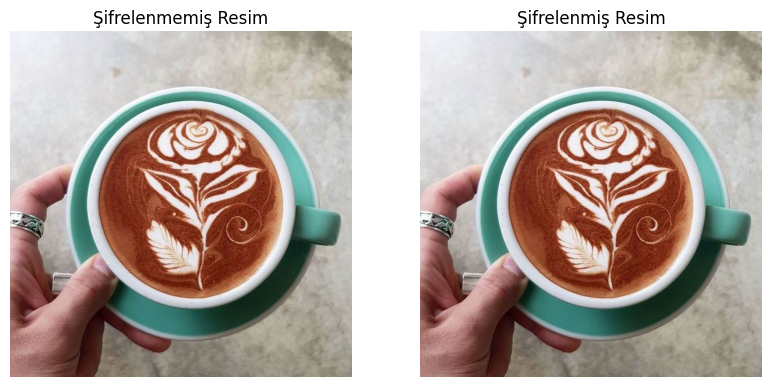

In [26]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def encode_image(image_path, secret_message, output_path):
    # Resmi aç
    image = Image.open(image_path)
    encoded_image = image.copy()

    # Mesajı ikili forma çevir
    binary_message = ''.join(format(ord(char), '08b') for char in secret_message) + '1111111111111110'  # Mesajın sonuna bit belirteci ekle
    data_index = 0
    message_length = len(binary_message)

    # Her pikselin en düşük bitine mesajı ekle
    for y in range(image.height):
        for x in range(image.width):
            pixel = list(encoded_image.getpixel((x, y)))
            for i in range(3):  # RGB kanalları
                if data_index < message_length:
                    pixel[i] = pixel[i] & ~1 | int(binary_message[data_index])  # En düşük biti değiştir
                    data_index += 1
            encoded_image.putpixel((x, y), tuple(pixel))
            if data_index >= message_length:
                break
        if data_index >= message_length:
            break

    # Şifreli resmi kaydet
    encoded_image.save(output_path)
    print("Mesaj başarıyla gizlendi.")

    return encoded_image  # Kodlanmış resmi döndür

def highlight_secret_message(secret_message):
    # Vurgulu bir görsel oluştur
    highlighted_image = Image.new("RGB", (600, 100), "white")
    # Mesajı renkli olarak ekle
    draw = ImageDraw.Draw(highlighted_image)
    draw.text((10, 40), secret_message, fill="red")

    return highlighted_image

if __name__ == "__main__":
    # Kullanım
    image_path = 'image.jpg'  # Gizlenecek resim
    secret_message = 'Bu mesaj Adli Bilisim Dersi Icin Eklenmistir'  # Gizlenecek mesaj
    output_path = 'encoded_image.png'  # Çıktı resmi

    # Şifreli resmi oluştur
    encoded_image = encode_image(image_path, secret_message, output_path)

    # Renkli mesaj vurgulama
    highlighted_message_image = highlight_secret_message(secret_message)

    # Görselleri yan yana göster
    plt.figure(figsize=(15, 5))

    # Şifrelenmemiş resim
    plt.subplot(1, 3, 1)
    original_image = Image.open(image_path)
    plt.imshow(original_image)
    plt.axis('off')
    plt.title('Şifrelenmemiş Resim')

    # Şifrelenmiş resim
    plt.subplot(1, 3, 2)
    plt.imshow(encoded_image)
    plt.axis('off')
    plt.title('Şifrelenmiş Resim')


In [27]:
from PIL import Image

def decode_image(image_path):
    # Resmi aç
    image = Image.open(image_path)
    binary_message = ''

    # Her pikselin en düşük bitini oku
    for y in range(image.height):
        for x in range(image.width):
            pixel = image.getpixel((x, y))
            for i in range(3):  # RGB kanalları
                binary_message += str(pixel[i] & 1)  # En düşük biti al
                # Mesajın sonunu kontrol et
                if binary_message[-16:] == '1111111111111110':  # Bit belirteci
                    binary_message = binary_message[:-16]  # Belirteci çıkar
                    break
            else:
                continue
            break
        else:
            continue
        break

    # İkili veriyi karakterlere çevir
    secret_message = ''
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i + 8]
        if len(byte) < 8:
            break
        secret_message += chr(int(byte, 2))

    return secret_message

# Kullanım
image_path = 'encoded_image.png'  # Gizli mesajın bulunduğu resim
decoded_message = decode_image(image_path)
print("Gizli Mesaj:", decoded_message)

Gizli Mesaj: Bu mesaj Adli Bilisim Dersi Icin Eklenmistir


**Veri Şifreleme**

Mesaj başarıyla gizlendi.


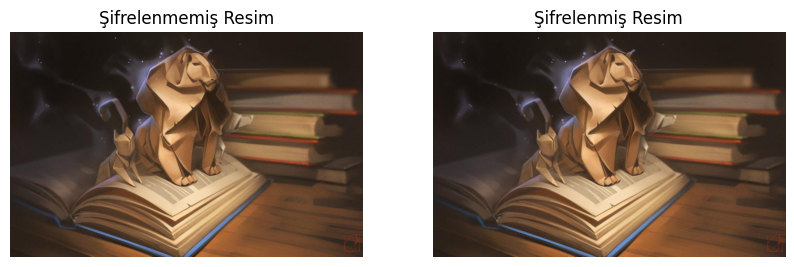

In [29]:
from PIL import Image
from cryptography.fernet import Fernet
import matplotlib.pyplot as plt

# Anahtar oluşturma
def generate_key():
    key = Fernet.generate_key()
    with open('secret.key', 'wb') as key_file:
        key_file.write(key)
    return key

# Anahtarı yükleme
def load_key():
    return open('secret.key', 'rb').read()

# Metni şifreleme
def encrypt_message(message):
    key = load_key()
    f = Fernet(key)
    encrypted_message = f.encrypt(message.encode())
    return encrypted_message

# Görsele mesaj ekleme
def encode_image(image_path, secret_message, output_path):
    image = Image.open(image_path)
    encoded_image = image.copy()

    binary_message = ''.join(format(byte, '08b') for byte in secret_message) + '1111111111111110'  # Son bit belirteci
    data_index = 0
    message_length = len(binary_message)

    for y in range(image.height):
        for x in range(image.width):
            pixel = list(encoded_image.getpixel((x, y)))
            for i in range(3):  # RGB kanalları
                if data_index < message_length:
                    pixel[i] = pixel[i] & ~1 | int(binary_message[data_index])
                    data_index += 1
            encoded_image.putpixel((x, y), tuple(pixel))
            if data_index >= message_length:
                break
        if data_index >= message_length:
            break

    encoded_image.save(output_path)
    print("Mesaj başarıyla gizlendi.")
    return encoded_image  # Kodlanmış resmi döndür

if __name__ == "__main__":
    # Anahtar oluşturma (ilk seferde sadece bir kez çalıştırın)
    # generate_key()  # Yalnızca bir kez çalıştırın

    # Şifrelemek istediğiniz mesaj
    original_message = "Bu mesaj Adli Bilisim Dersi Icin Eklenmistir"

    # Mesajı şifrele
    encrypted_message = encrypt_message(original_message)

    # Gizlenecek resmi ve çıktıyı belirleyin
    image_path = 'image_2.jpg'  # Gizlenecek resim (bu resmi kendiniz oluşturmalısınız)
    output_path = 'encoded_image_2.png'  # Çıktı resmi

    # Şifreli mesajı görsele ekle
    encoded_image = encode_image(image_path, encrypted_message, output_path)

    # Görselleri yan yana göster
    plt.figure(figsize=(10, 5))

    # Şifrelenmemiş resim
    plt.subplot(1, 2, 1)
    original_image = Image.open(image_path)
    plt.imshow(original_image)
    plt.axis('off')
    plt.title('Şifrelenmemiş Resim')

    # Şifrelenmiş resim
    plt.subplot(1, 2, 2)
    plt.imshow(encoded_image)
    plt.axis('off')
    plt.title('Şifrelenmiş Resim')

    plt.show()

Çözülmemiş Mesaj (Şifreli): b'gAAAAABnTbPc99YUyYnUBsFOmnGtt1941LsIKNp3MWOW0zePZrVq8WK3vQMaNCrYgtY01YWJCYnIpzknaybWLP1S6SLci3YRHzjXYpRoQPyUmHlaL_P4HrbYdRal23etfulCorWtvp7Z'
Çözülmüş Mesaj: Bu mesaj Adli Bilisim Dersi Icin Eklenmistir


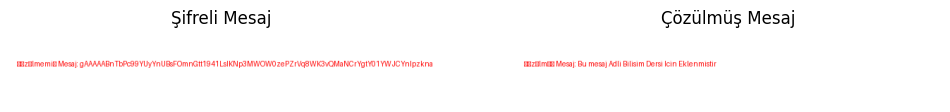

In [32]:
from PIL import Image, ImageDraw, ImageFont
from cryptography.fernet import Fernet
import matplotlib.pyplot as plt

# Anahtarı yükleme
def load_key():
    return open('secret.key', 'rb').read()

# Görselden mesajı çıkarma
def decode_image(image_path):
    image = Image.open(image_path)
    binary_message = ''

    for y in range(image.height):
        for x in range(image.width):
            pixel = image.getpixel((x, y))
            for i in range(3):  # RGB kanalları
                binary_message += str(pixel[i] & 1)  # En düşük biti al
                # Mesajın sonunu kontrol et
                if binary_message[-16:] == '1111111111111110':  # Bit belirteci
                    binary_message = binary_message[:-16]  # Belirteci çıkar
                    break
            else:
                continue
            break
        else:
            continue
        break

    # İkili veriyi byte dizisine çevir
    encrypted_message = bytearray()
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i + 8]
        if len(byte) < 8:
            break
        encrypted_message.append(int(byte, 2))

    return bytes(encrypted_message)  # Byte dizisi olarak döndür

# Şifreli mesajı çözme
def decrypt_message(encrypted_message):
    key = load_key()
    f = Fernet(key)
    decrypted_message = f.decrypt(encrypted_message).decode()
    return decrypted_message

# Mesajı görsel olarak oluşturma
def create_message_image(message, title):
    font_size = 20
    image = Image.new('RGB', (600, 100), 'white')
    draw = ImageDraw.Draw(image)
    draw.text((10, 40), f"{title}: {message}", fill='red')
    return image

# Kullanım
if __name__ == "__main__":
    # Gizli mesajı bulmak için resmi belirleyin
    image_path = 'encoded_image_2.png'  # Gizli mesajın bulunduğu resim

    # Görselden gizli mesajı çıkar
    encrypted_message = decode_image(image_path)

    # Çözülmemiş mesajı yazdır
    print("Çözülmemiş Mesaj (Şifreli):", encrypted_message)

    # Şifreli mesajı çöz
    decrypted_message = decrypt_message(encrypted_message)  # Doğru byte dizisiyle çöz

    # Çözülmüş mesajı yazdır
    print("Çözülmüş Mesaj:", decrypted_message)

    # Görsel olarak mesajları oluştur
    encrypted_image = create_message_image(encrypted_message.decode(errors='ignore'), "Çözülmemiş Mesaj")
    decrypted_image = create_message_image(decrypted_message, "Çözülmüş Mesaj")

    # Görselleri yan yana göster
    plt.figure(figsize=(12, 6))

    # Şifreli mesaj
    plt.subplot(1, 2, 1)
    plt.imshow(encrypted_image)
    plt.axis('off')
    plt.title('Şifreli Mesaj')

    # Çözülmüş mesaj
    plt.subplot(1, 2, 2)
    plt.imshow(decrypted_image)
    plt.axis('off')
    plt.title('Çözülmüş Mesaj')

    plt.show()

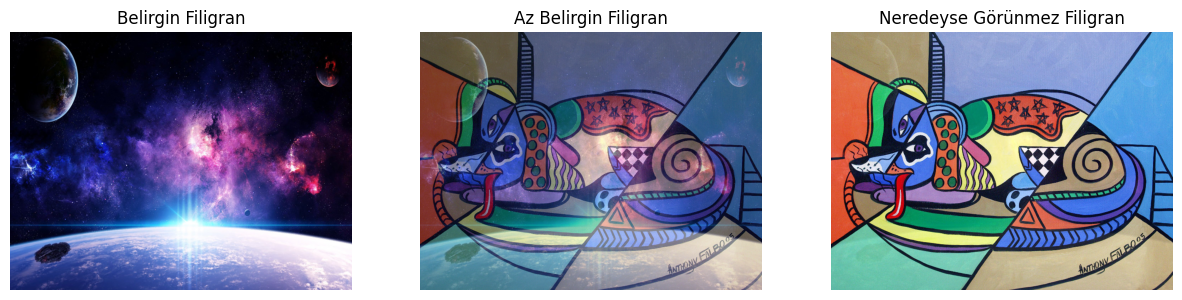

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

def add_watermark(base_image_path, watermark_path, opacity):
    base_image = Image.open(base_image_path).convert("RGBA")
    watermark = Image.open(watermark_path).convert("RGBA")

    # Filigranı boyutlandırma
    watermark = watermark.resize(base_image.size)

    # Filigranı şeffaflık ile ayarlama
    watermark_with_opacity = Image.new("RGBA", watermark.size)
    for x in range(watermark.width):
        for y in range(watermark.height):
            r, g, b, a = watermark.getpixel((x, y))
            watermark_with_opacity.putpixel((x, y), (r, g, b, int(a * opacity)))

    # Filigranı ekleme
    combined_image = Image.alpha_composite(base_image, watermark_with_opacity)
    return combined_image

def save_combined_images(base_image_path, watermark_path):
    # Farklı opasite seviyeleri ile filigran ekleme
    visible_watermark = add_watermark(base_image_path, watermark_path, 1.0)   # Belirgin filigran
    less_visible_watermark = add_watermark(base_image_path, watermark_path, 0.5)  # Az belirgin filigran
    invisible_watermark = add_watermark(base_image_path, watermark_path, 0.1)  # Neredeyse görünmez filigran

    # Üç resmi yan yana birleştirme
    total_width = visible_watermark.width * 3
    max_height = max(visible_watermark.height, less_visible_watermark.height, invisible_watermark.height)

    combined_image = Image.new('RGBA', (total_width, max_height))

    combined_image.paste(visible_watermark, (0, 0))
    combined_image.paste(less_visible_watermark, (visible_watermark.width, 0))
    combined_image.paste(invisible_watermark, (visible_watermark.width * 2, 0))

    combined_image.save('combined_watermarks.png')

    return visible_watermark, less_visible_watermark, invisible_watermark

if __name__ == "__main__":
    # Giriş görsel ve filigran yolu
    base_image_path = 'input_image.jpg'  # Ana resminiz
    watermark_path = 'watermark.jpg'      # Filigran resmi

    # Birleştirilmiş görüntüleri kaydet ve döndür
    visible, less_visible, invisible = save_combined_images(base_image_path, watermark_path)

    # Görselleri ekranda göster
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Belirgin Filigran')
    plt.imshow(visible)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Az Belirgin Filigran')
    plt.imshow(less_visible)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Neredeyse Görünmez Filigran')
    plt.imshow(invisible)
    plt.axis('off')

    plt.show()

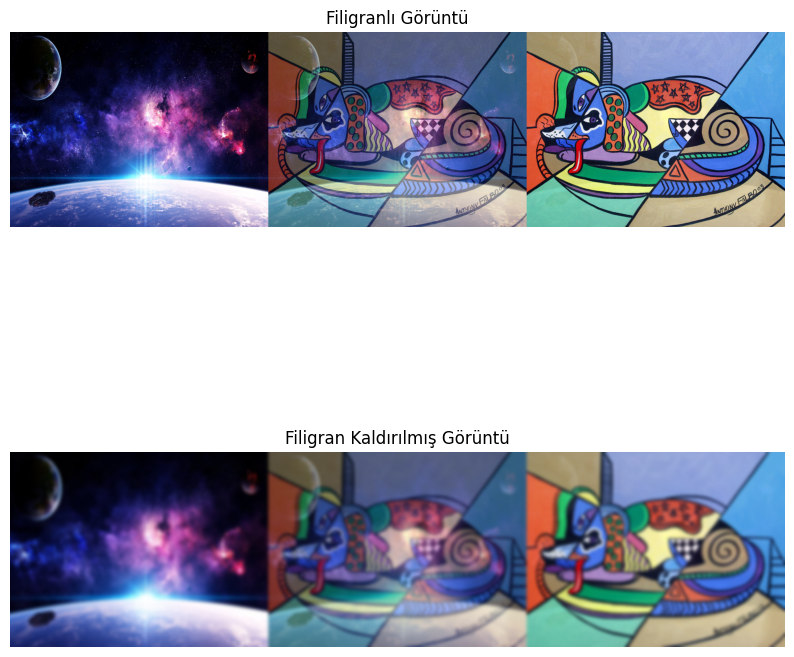

In [35]:
from PIL import Image, ImageFilter, ImageEnhance
import matplotlib.pyplot as plt

def remove_watermark(image_path, output_path):
    # Görseli aç
    image = Image.open(image_path).convert("RGBA")

    # Görüntüyü biraz bulanıklaştır
    blurred_image = image.filter(ImageFilter.GaussianBlur(5))  # 5 piksel bulanıklaştırma

    # Keskinleştirme uygulama
    enhancer = ImageEnhance.Sharpness(blurred_image)
    sharpened_image = enhancer.enhance(2.0)  # Keskinliği artır

    # Sonucu kaydet
    sharpened_image.save(output_path)

    return image, sharpened_image  # Orijinal ve işlenmiş görüntüleri döndür

if __name__ == "__main__":
    # Filigranlı görüntü yolu
    image_path = 'combined_watermarks.png'  # Filigranlı resminiz
    output_path = 'removed_watermark.png'   # Filigran kaldırılmış sonuç resmi

    # Filigranı kaldır ve orijinal resmi al
    original_image, processed_image = remove_watermark(image_path, output_path)

    # Görselleri ekranda göster
    plt.figure(figsize=(10, 10))

    # Orijinal görüntü
    plt.subplot(2, 1, 1)
    plt.title('Filigranlı Görüntü')
    plt.imshow(original_image)
    plt.axis('off')

    # Filigran kaldırılmış görüntü
    plt.subplot(2, 1, 2)
    plt.title('Filigran Kaldırılmış Görüntü')
    plt.imshow(processed_image)
    plt.axis('off')

    plt.show()